![logo](./logo.jpeg)
## EXAMEN MÓDULO PROGRAMACIÓN INTELIGENCIA ARTIFICIAL.   (2ª EVALUACIÓN)
### C.E. INTELIGENCIA ARTIFICIAL Y BIG DATA - FECHA: 10 MAYO 2024
### *NOMBRE:*  **NOELIA OTAZO ROJO**

In [97]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1_l2

import warnings
warnings.filterwarnings('ignore')

1.- El fichero **titanic.csv** contiene información sobre los pasajeros del Titanic. Crear un dataframe con Pandas y a partir de él generar los siguientes diagramas:  (**2 ptos.**)


- Diagrama de sectores con los fallecidos y supervivientes.
- Histograma con las edades.
- Diagrama de barras con el número de personas en cada clase.
- Diagrama de barras con el número de personas fallecidas y supervivientes en cada clase.

In [98]:
# Carga del dataset
titanic = pd.read_csv("./titanic.csv")
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


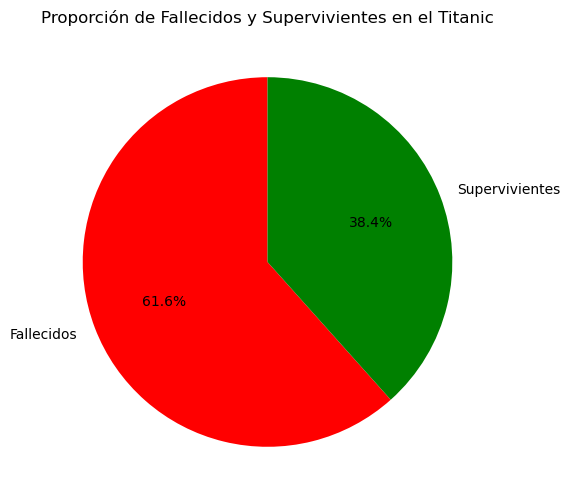

In [99]:
## DIAGRAMA DE SECTORES CON LOS FALLECIDOS Y SUPERVIVIENTES.
survival_counts = titanic['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Fallecidos', 'Supervivientes'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Proporción de Fallecidos y Supervivientes en el Titanic')
plt.show()

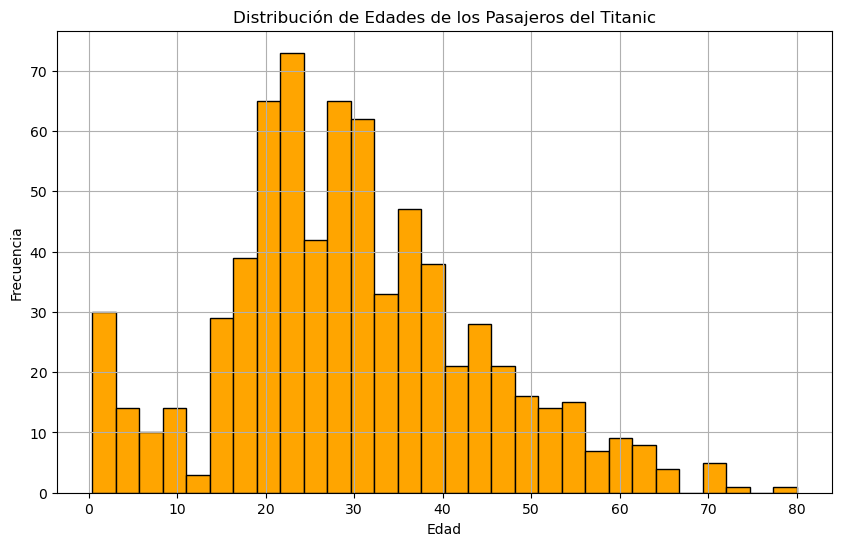

In [100]:
## HISTOGRAMA CON LAS EDADES
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Distribución de Edades de los Pasajeros del Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

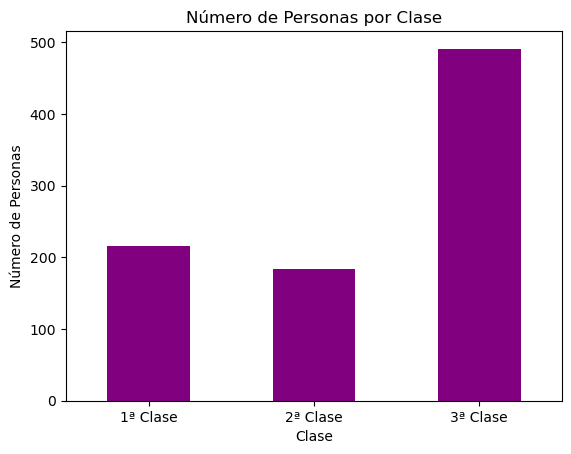

In [101]:
## DIAGRAMA DE BARRAS CON EL NÚMERO DE PERSONAS DE CADA CLASE
class_counts = titanic['Pclass'].value_counts().sort_index()

fig, ax = plt.subplots()
class_counts.plot(kind='bar', color='purple', ax=ax)
ax.set_title('Número de Personas por Clase')
ax.set_xlabel('Clase')
ax.set_ylabel('Número de Personas')
ax.set_xticklabels(['1ª Clase', '2ª Clase', '3ª Clase'], rotation=0)
plt.show()


<Figure size 1000x600 with 0 Axes>

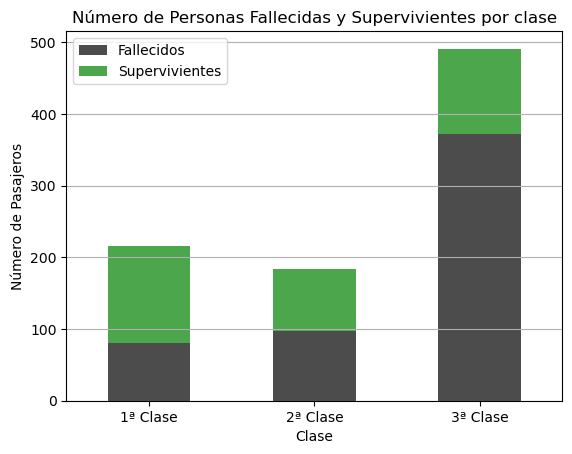

In [102]:
## DIAGRAMA DE BARRAS CON EL NÚMERO DE PERSONAS FALLECIDAS Y SUPERVIVIENTES POR CADA CLASE
survival_class = titanic.groupby(['Pclass', 'Survived']).size().unstack()

plt.figure(figsize=(10, 6))
survival_class.plot(kind='bar', stacked=True, color=['black', 'green'], alpha=0.7)
plt.title('Número de Personas Fallecidas y Supervivientes por clase')
plt.xlabel('Clase')
plt.ylabel('Número de Pasajeros')
plt.xticks(ticks=[0, 1, 2], labels=['1ª Clase', '2ª Clase', '3ª Clase'], rotation=0)
plt.legend(['Fallecidos', 'Supervivientes'])
plt.grid(axis='y')
plt.show()


2.- Sobre la imagen dada (lena_gris.jpg), realiza las siguientes transformaciones: **(2 ptos)**
- Rotación de 60º y factor de escala 1 
- Traslación (25 px a la derecha y 25 px hacia arriba)
- Escalado al 40 %
- Inclinación 15 grados en eje x y 20 grados en eje y
  
(Se debe mostrar cada bloque de código indicando la transformación que realiza).

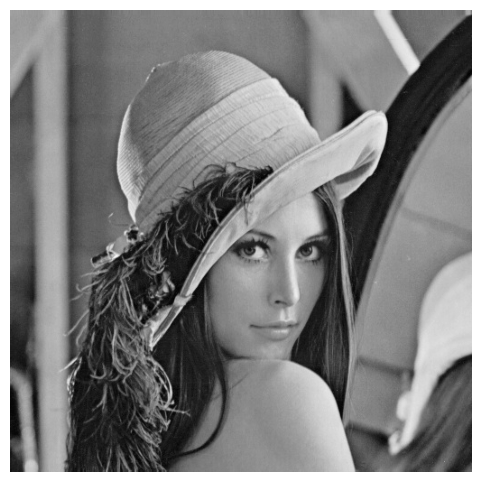

In [103]:
## ROTACIÓN 60 Y FACTOR DE ESCALA 1

# Cargar la imagen
image_path = './lena_gris.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


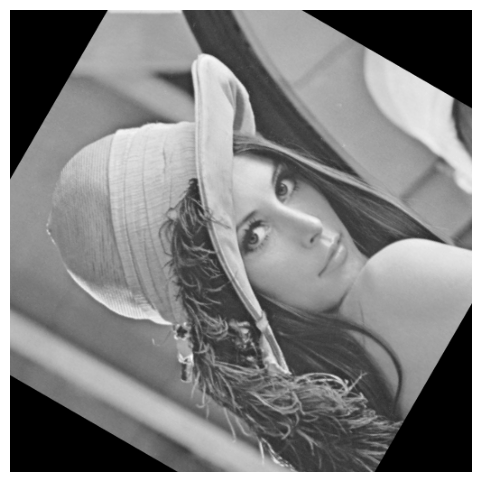

In [104]:
## TRASLACIÓN (25 px a la derecha y 25 px hacia arriba)

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Dimensiones de la imagen para calcular el centro
(h, w) = image.shape[:2]
center = (w / 2, h / 2)

# Definir la matriz de rotación para rotar 60 grados alrededor del centro sin cambiar la escala
M = cv2.getRotationMatrix2D(center, 60, 1.0) 

# Aplicar la rotación
rotated_image = cv2.warpAffine(image, M, (w, h))

# Mostrar la imagen
plt.figure(figsize=(6,6))
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

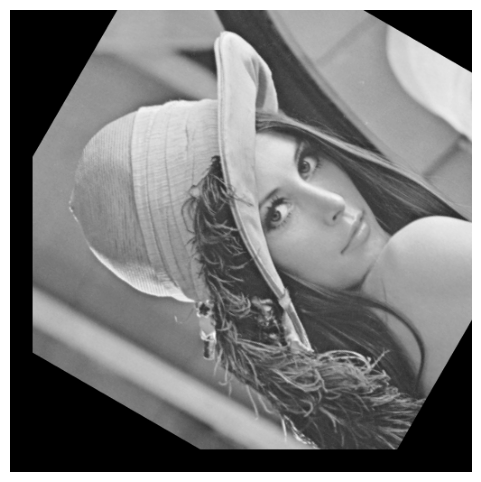

In [105]:
## Escalado al 40 %

# Uso la imagen rotada
translation_matrix = np.float32([[1, 0, 25], [0, 1, -25]])

# Aplicar la traslación
translated_image = cv2.warpAffine(rotated_image, translation_matrix, (rotated_image.shape[1], rotated_image.shape[0]))

# Mostrar la imagen
plt.figure(figsize=(6,6))
plt.imshow(translated_image, cmap='gray')
plt.axis('off')
plt.show()

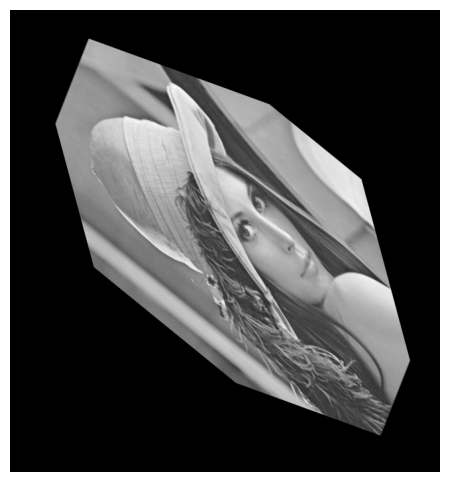

In [106]:
## Inclinación 15 grados en eje x y 20 grados en eje y

# Convertir grados a radianes para el cálculo de tangente
angle_x = np.deg2rad(15)
angle_y = np.deg2rad(20)

# Crear la matriz de transformación para la inclinación
shear_matrix = np.float32([
    [1, np.tan(angle_x), 0],
    [np.tan(angle_y), 1, 0]
])

# Tamaño de la imagen original
(h, w) = translated_image.shape[:2]

# Calcular el nuevo tamaño de la imagen
new_w = int(w + h * np.tan(angle_x))
new_h = int(h + w * np.tan(angle_y))

# Aplicar la inclinación
sheared_image = cv2.warpAffine(translated_image, shear_matrix, (new_w, new_h))

# Mostrar la imagen
plt.figure(figsize=(6,6))
plt.imshow(sheared_image, cmap='gray')
plt.axis('off')
plt.show()

3.- Dado el DataFrame df_empleados, realiza las siguientes tareas: **(0,75 ptos.)**

- Agrupa los datos por Departamento y calcula el salario medio por departamento.
- Añade una columna Aumento que incremente el salario en un 10% para todos los empleados.
- Ordena el DataFrame por la columna Salario de forma descendente.

In [107]:
data = {
    'Nombre': ['Ana', 'Luis', 'Sonia', 'Jorge', 'Carla'],
    'Edad': [28, 34, 29, 40, 32],
    'Departamento': ['Ventas', 'Marketing', 'Ventas', 'Marketing', 'Ventas'],
    'Salario': [35000, 40000, 36000, 41000, 38000]
}

df_empleados = pd.DataFrame(data)
df_empleados.head()


,Nombre,Edad,Departamento,Salario
0,Ana,28,Ventas,35000
1,Luis,34,Marketing,40000
2,Sonia,29,Ventas,36000
3,Jorge,40,Marketing,41000
4,Carla,32,Ventas,38000


In [108]:
## DATOS POR DEPATAMENTO Y CALCULA EL SALARIO MEDIO
salario_medio = df_empleados.groupby('Departamento')['Salario'].mean()
print("Salario medio por departamento:")
print(salario_medio)

Salario medio por departamento:
Departamento
Marketing    40500.000000
Ventas       36333.333333
Name: Salario, dtype: float64


In [109]:
## AÑADIR COLUMNA AUMENTO QUE INCREMENTE EL SARIO EN UN 10%
df_empleados['Aumento'] = df_empleados['Salario'] * 1.10

## ORDENAR POR SALARIO DE FORMA DESCENDENTE
df_empleados.sort_values(by='Salario', ascending=False, inplace=True)

## ORDENA EL DATAFRAME POR SALARIO DE FORMA DESCENDENTE
print("DataFrame actualizado:")
print(df_empleados)

DataFrame actualizado:
  Nombre  Edad Departamento  Salario  Aumento
3  Jorge    40    Marketing    41000  45100.0
1   Luis    34    Marketing    40000  44000.0
4  Carla    32       Ventas    38000  41800.0
2  Sonia    29       Ventas    36000  39600.0
0    Ana    28       Ventas    35000  38500.0


4.Dada la siguiente lista de números, usa una función lambda para crear una nueva lista con el cuadrado de cada número de dicha lista.**(0,5 ptos.)**

In [110]:
numeros = [1, 2, 3, 4, 5]

# Lambda para calcular el cuadrado de cada número
cuadrados = list(map(lambda x: x**2, numeros))

# Mostrar los cuadrados
print(cuadrados)

[1, 4, 9, 16, 25]


5.- Dada la siguiente lista de números, usa una función lambda para filtrar aquellos que sean múltiplos de 3 y múestralos por pantalla.  **(0,5 ptos)**

In [111]:
numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 21, 24]

# Filtrar los múltiplos de 3
multiplos_de_tres = list(filter(lambda x: x % 3 == 0, numeros))

# Mostrar los múltiplos de 3
print(multiplos_de_tres)

[3, 6, 9, 12, 15, 18, 21, 24]


6.- Dado el dataframe df_empleados, realiza las siguientes tareas:**(1 ptos.)**

- Calcula el salario promedio por departamento y ciudad.
- Encuentra el salario máximo por departamento y ciudad.

In [112]:
data = {
    'Departamento': ['Ventas', 'Ventas', 'Ventas', 'Marketing', 'Marketing', 'Marketing'],
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Madrid', 'Barcelona', 'Barcelona'],
    'Salario': [35000, 42000, 37000, 40000, 45000, 38000]
}
df_empleados = pd.DataFrame(data)
df_empleados.head()

,Departamento,Ciudad,Salario
0,Ventas,Madrid,35000
1,Ventas,Barcelona,42000
2,Ventas,Madrid,37000
3,Marketing,Madrid,40000
4,Marketing,Barcelona,45000


In [113]:
## SALARIO PROMEDIO POR DEPARTAMENTO Y CIUDAD
promedio_salario = df_empleados.groupby(['Departamento', 'Ciudad'])['Salario'].mean().reset_index()
print("Salario Promedio por Departamento y Ciudad:")
print(promedio_salario.to_string())


Salario Promedio por Departamento y Ciudad:
  Departamento     Ciudad  Salario
0    Marketing  Barcelona  41500.0
1    Marketing     Madrid  40000.0
2       Ventas  Barcelona  42000.0
3       Ventas     Madrid  36000.0


In [114]:
## SALARIO MÁXIMO POR DEPARTAMENTO Y CIUDAD
maximo_salario = df_empleados.groupby(['Departamento', 'Ciudad'])['Salario'].max().reset_index()
print("Salario Máximo por Departamento y Ciudad:")
print(maximo_salario.to_string())


Salario Máximo por Departamento y Ciudad:
  Departamento     Ciudad  Salario
0    Marketing  Barcelona    45000
1    Marketing     Madrid    40000
2       Ventas  Barcelona    42000
3       Ventas     Madrid    37000


7.- Construye una red neuronal convolucional para analizar imágenes de un tamaño de 64*64 a color, con las siguientes características: **(1 pto.)**

- Una capa convolucional con 8 filtros, tamaño de kernel 3x3, y función de activación ReLU.
- Una capa de max pooling con tamaño de pool 2x2.
- Una capa convolucional con 16 filtros, tamaño de kernel 3x3, y función de activación ReLU.
- Una capa de max pooling con tamaño de pool 2x2.
- Una capa convolucional con 32 filtros, tamaño de kernel 3x3, y función de activación ReLU.
- Una capa completamente conectada con 128 neuronas y función de activación ReLU. 

In [115]:
model = Sequential(
    [
        Conv2D(8, (3, 3), activation="relu", input_shape=(64, 64, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dense(128, activation="relu"),
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 31, 31, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 16)        1168      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 32)         

8.- Dado el siguiente dataframe df_jugadores con datos de jugadores de fútbol, realiza las siguientes tareas: **(0,75 ptos)**
- Encuentra el promedio de goles y asistencias por equipo.
- Calcula el total de goles y asistencias, y el promedio de goles por jugador para cada equipo.

In [116]:
data = {
    'Jugador': ['Messi', 'Ronaldo', 'Neymar', 'Salah', 'Mbappé', 'Lewandowski', 'Kane', 'Hazard'],
    'Equipo': ['Barcelona', 'Juventus', 'PSG', 'Liverpool', 'PSG', 'Bayern', 'Tottenham', 'Real Madrid'],
    'Goles': [30, 25, 28, 22, 27, 29, 20, 15],
    'Asistencias': [12, 10, 9, 13, 14, 8, 7, 6]
}
df_jugadores = pd.DataFrame(data)
df_jugadores.head()

,Jugador,Equipo,Goles,Asistencias
0,Messi,Barcelona,30,12
1,Ronaldo,Juventus,25,10
2,Neymar,PSG,28,9
3,Salah,Liverpool,22,13
4,Mbappé,PSG,27,14


In [117]:
## PROMEDIO DE GOLES Y ASISTENCIAS POR EQUIPO
promedios_equipo = df_jugadores.groupby('Equipo').agg({'Goles': 'mean', 'Asistencias': 'mean'}).reset_index()
promedios_equipo_str = promedios_equipo.to_string()
print("Promedio de Goles y Asistencias por Equipo:\n" + promedios_equipo_str)


Promedio de Goles y Asistencias por Equipo:
        Equipo  Goles  Asistencias
0    Barcelona   30.0         12.0
1       Bayern   29.0          8.0
2     Juventus   25.0         10.0
3    Liverpool   22.0         13.0
4          PSG   27.5         11.5
5  Real Madrid   15.0          6.0
6    Tottenham   20.0          7.0


In [118]:
## TOTAL DE GOLES Y ASISTENCIAS 
total_goles = df_jugadores['Goles'].sum()
total_asistencias = df_jugadores['Asistencias'].sum()
print("Total de Goles: " + str(total_goles))
print("Total de Asistencias: " + str(total_asistencias))


## PROMEDIO DE GOLES POR JUGADOR DE PARA CADA EQUIPO
goles_jugador = df_jugadores.groupby('Equipo').agg({'Goles': 'mean'}).reset_index()
goles_jugador_str = goles_jugador.to_string()
print("Promedio de Goles por Jugador de cada Equipo:\n" + goles_jugador_str)



Total de Goles: 196
Total de Asistencias: 79
Promedio de Goles por Jugador de cada Equipo:
        Equipo  Goles
0    Barcelona   30.0
1       Bayern   29.0
2     Juventus   25.0
3    Liverpool   22.0
4          PSG   27.5
5  Real Madrid   15.0
6    Tottenham   20.0


9.- Construye una red neuronal convolucional para analizar imágenes de un tamaño de 64 x 64 a color, con las siguientes características: **(1,5 ptos.)**

- Una capa convolucional con 16 filtros, tamaño de kernel 3x3, función de activación ReLU, y regularización combinada L1+L2.
- Una capa de max pooling con tamaño de pool 2x2.
- Una capa convolucional con 32 filtros, tamaño de kernel 3x3, función de activación ReLU.
- Una capa de max pooling con tamaño de pool 2x2.
- Una capa de dropout con probabilidad de 0.3.
- Una capa de aplanamiento.
- Una capa completamente conectada con 128 neuronas, función de activación ReLU.
- Una capa de dropout con probabilidad de 0.4. 

In [119]:
model = Sequential(
    [
        Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.4),
    ]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 31, 31, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 6272)             